In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gp
from matplotlib import rcParams

Loading dataframes from clean folder and assigning them to variables

In [3]:
acs_income = pd.read_csv('../data/clean/acs_income.csv')
rental_prices = pd.read_csv('../data/clean/nyc_rental_prices.csv')
zhome_value = pd.read_csv('../data/clean/zhome_value.csv')
airbnb = pd.read_csv('../data/clean/inside_airbnb_clean.gz')

Inspecting columns for each dataframe

In [3]:
acs_income.columns

Index(['year', 'borough', 'zipcode', 'households_s1901_total_population',
       'households_s1902_total_population', 'households_median_income',
       'households_s1901_mean_income', 'households_s1902_mean_income',
       'families_total_population', 'families_median_income',
       'families_mean_income', 'married_couple_families_total_population',
       'married_couple_families_median_income',
       'married_couple_families_mean_income',
       'nonfamily_households_total_population',
       'nonfamily_households_median_income',
       'nonfamily_households_mean_income', 'resident_total_population',
       'resident_mean_income', 'white_total_population', 'white_mean_income',
       'african_american_total_population', 'african_american_mean_income',
       'amer_indian/alaska_native_total_population',
       'amer_indian/alaska_native_mean_income', 'asian_total_population',
       'asian_mean_income', 'hawaiian/_pacific_islander_total_population',
       'hawaiian/_pacific_islan

In [4]:
rental_prices.columns

Index(['rent', 'borough', 'zipcode', 'year'], dtype='object')

In [5]:
zhome_value.columns

Index(['zipcode', 'state', 'city', 'borough', 'year', 'home_value'], dtype='object')

In [6]:
airbnb.columns

Index(['id', 'last_scraped', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'bedrooms', 'availability_365',
       'calculated_host_listings_count', 'geom', 'zipcode', 'borough', 'year',
       'availability_pct'],
      dtype='object')


Let's Play Around


In [66]:
# Get yearly NYC median average for column `value`
def get_nyc_data(df, value):
    nyc_data = df.groupby(["year"])[value].mean().to_frame().reset_index()
    nyc_data["borough"] = "NYC"
    return nyc_data

# Gets yearly sorty data for any borough based on column `value`
def extract_yearly_sorted_data(df, boro, value):
    return df[df["borough"] == boro][[value, "year", "borough" ]].reset_index(drop=True)

# Create delta column for any data frame column
def create_delta_col(df, value):
    delta_col = value + "_delta"
    df[delta_col] = df[value].diff().replace(np.nan, 0).astype("int")
    return df.drop(columns=[value]).reset_index(drop=True)

In [60]:
# COMPUTATION FUNCTIONS

# Compute yearly delta for NYC
def compute_nyc_delta(df, value):
    data = get_nyc_data(df, value)
    return create_delta_col(data, value)

# Compute yearly delta for any boro based on column `value`
def compute_boro_delta(df, boro, value):
    data = extract_yearly_sorted_data(df, boro, value)
    return create_delta_col(data, value)

# Create delta df for all boros
def compute_all_boros_delta(df, delta_metric):
    boros = df["borough"].unique()
    boros_delta = pd.DataFrame()
    for boro in boros:
        boros_delta = pd.concat([boros_delta, compute_boro_delta(df, boro, delta_metric)])
    return boros_delta

In [59]:
# HELPER FUNCTIONS

# Get color palette based on delta value
def get_delta_colors(delta_list):
    return ["#8CD47E" if i > 0.0 else "#FF6961" for i in delta_list]

# Set annotations for values on bar
def set_bar_annotations(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),\
        (p.get_x() + p.get_width() / 2,\
        p.get_height()), ha='center', va='center',\
        xytext=(0, 8),\
        textcoords='offset points')

# Extracts labeled delta column by removing year and borough from columns list copy
def get_delta_column(columns):
    delta_column = list(columns)
    delta_column.remove("year")
    delta_column.remove("borough")
    return delta_column[0]

def format_label(unformatted_title):
    return unformatted_title.upper().replace("_", " ")
    

In [62]:
# COMPUTATION FUNCTIONS

# Map chart for FacetGrid
def map_delta(data, color):
    df = pd.DataFrame(data)
    
    delta_column = get_delta_column(df.columns.to_list())
    df[delta_column] = df[delta_column].div(1000).round(2)
    
    chart = sns.barplot(x=df["year"], y=df[delta_column], palette=get_delta_colors(df[delta_column].to_list()))
    
    # Format Chart
    set_bar_annotations(chart.axes)
    chart.figure.set_size_inches((6,12))
    chart.axes.tick_params(axis='x', rotation=90)
    chart.axes.set_ylabel("delta (thousands)")
    title = 'yearly {} for {}'.format(delta_column, df["borough"].unique()[0])
    chart.axes.set_title(format_label(title))

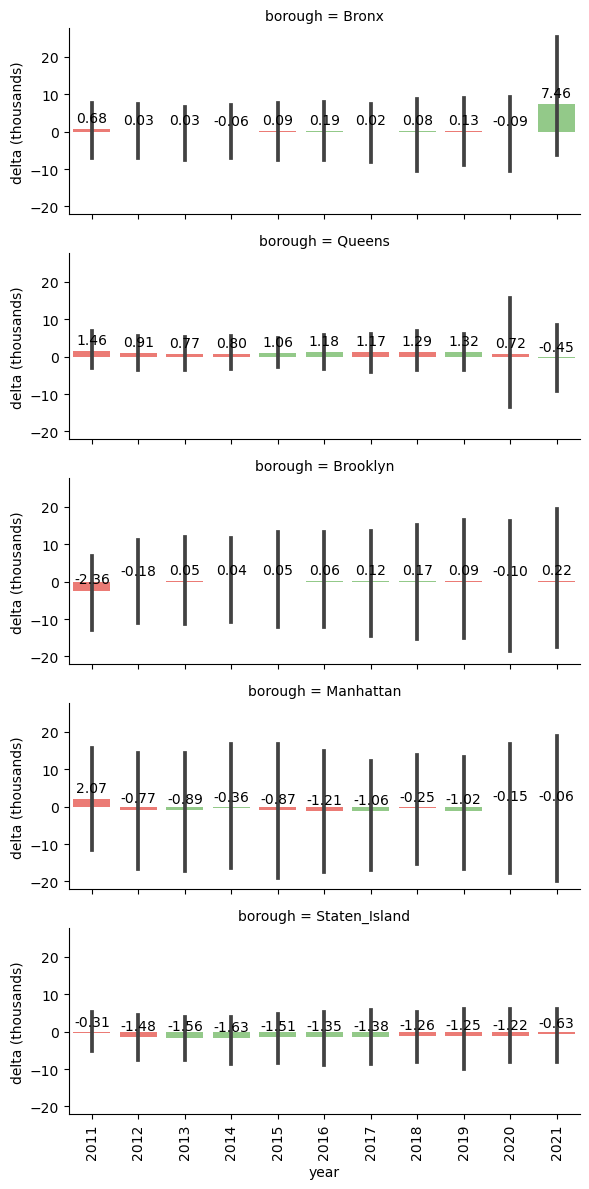

In [67]:
delta_metric = "households_s1901_mean_income"
df = acs_income
# Get data for boros and NYC
boros_delta = compute_all_boros_delta(df, delta_metric)
nyc_delta = compute_nyc_delta(df, delta_metric)

g = sns.FacetGrid(boros_delta, row="borough")

# Get data for boros
g.map_dataframe(map_delta)

In [ ]:
acs_income['mean_income_delta'] = acs['households_s1901_mean_income']

In [15]:
abnb_temp = airbnb.groupby(['zipcode'])['id'].count().reset_index()
acs_temp = acs_income.groupby(['zipcode'])['households_s1901_mean_income'].mean().reset_index()
abnb_acs = abnb_temp.merge(acs_temp, how='left', left_on='zipcode', right_on='zipcode')

In [8]:
acs_income_g = acs_income.groupby()

In [77]:
b = acs_income.groupby(['borough','year'])['households_s1901_mean_income'].mean().to_frame().reset_index()

In [78]:
b

,borough,year,households_s1901_mean_income
0,Bronx,2011,50827.538462
1,Bronx,2012,51062.730769
2,Bronx,2013,51636.346154
3,Bronx,2014,52282.692308
4,Bronx,2015,53150.076923
5,Bronx,2016,54756.846154
6,Bronx,2017,56931.538462
7,Bronx,2018,60311.192308
8,Bronx,2019,62839.461538
9,Bronx,2020,65394.692308


In [85]:
acs_boro = acs_income.groupby(['borough','year','zipcode'])['households_s1901_mean_income'].mean().reset_index()

<AxesSubplot:xlabel='year', ylabel='households_s1901_mean_income'>

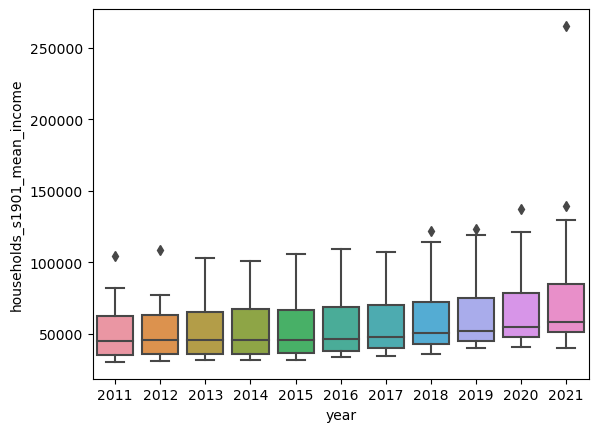

In [91]:
sns.boxplot(data=acs_income[acs_income['borough']=='Bronx'], x='year', y='households_s1901_mean_income')

<AxesSubplot:xlabel='year', ylabel='households_s1901_mean_income'>

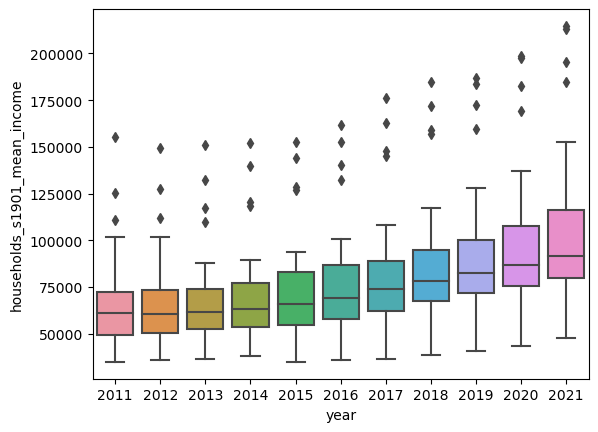

In [92]:
sns.boxplot(data=acs_income[acs_income['borough']=='Brooklyn'], x='year', y='households_s1901_mean_income')

<AxesSubplot:xlabel='year', ylabel='households_s1901_mean_income'>

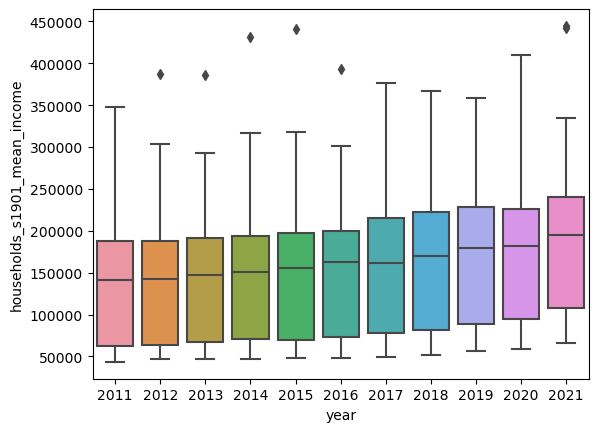

In [93]:
sns.boxplot(data=acs_income[acs_income['borough']=='Manhattan'], x='year', y='households_s1901_mean_income')

<AxesSubplot:xlabel='year', ylabel='households_s1901_mean_income'>

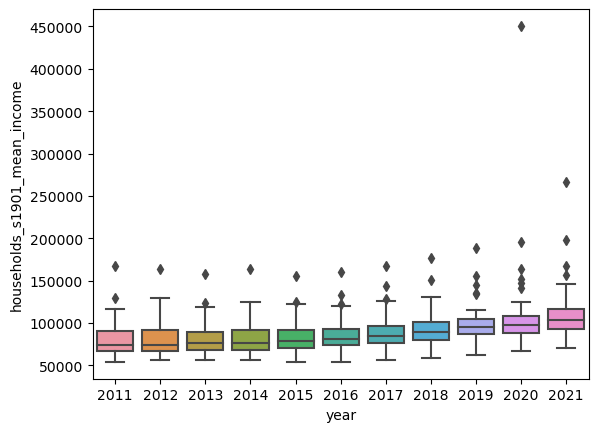

In [94]:
sns.boxplot(data=acs_income[acs_income['borough']=='Queens'], x='year', y='households_s1901_mean_income')

<AxesSubplot:xlabel='year', ylabel='households_s1901_mean_income'>

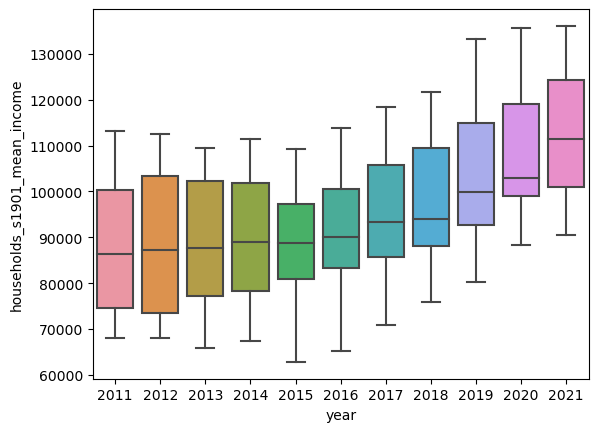

In [95]:
sns.boxplot(data=acs_income[acs_income['borough']=='Staten_Island'], x='year', y='households_s1901_mean_income')

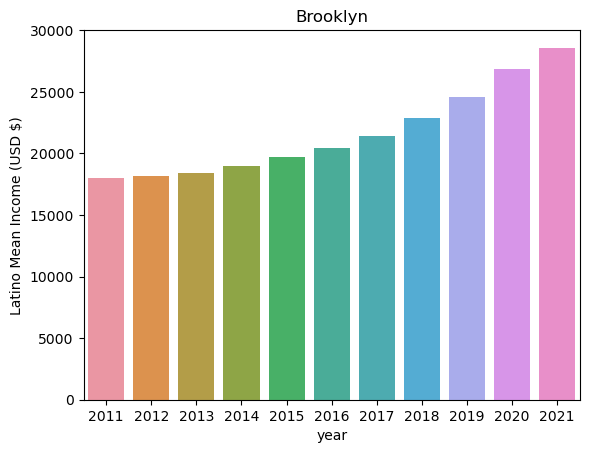

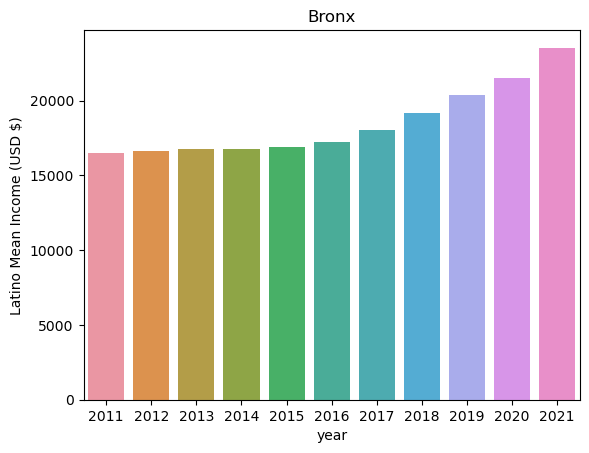

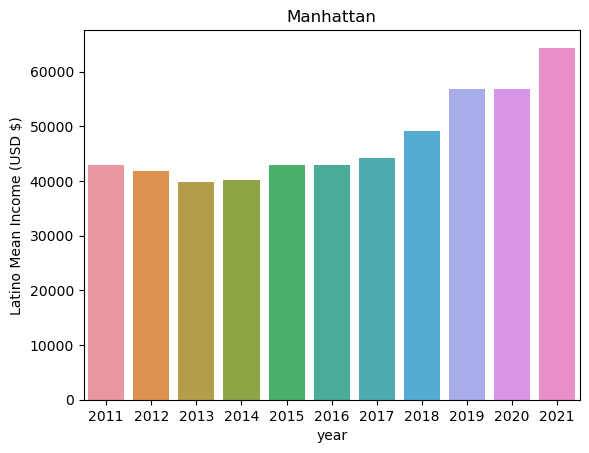

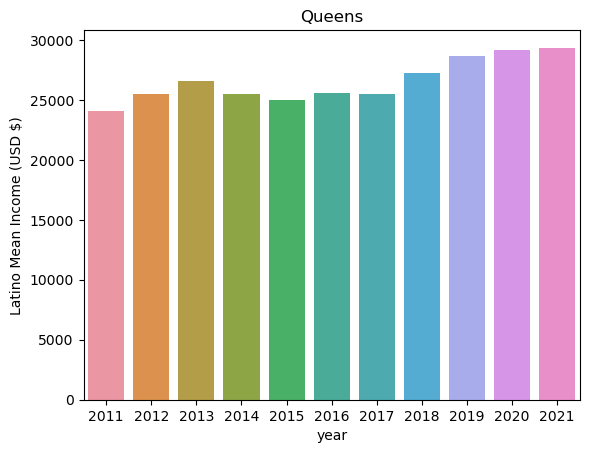

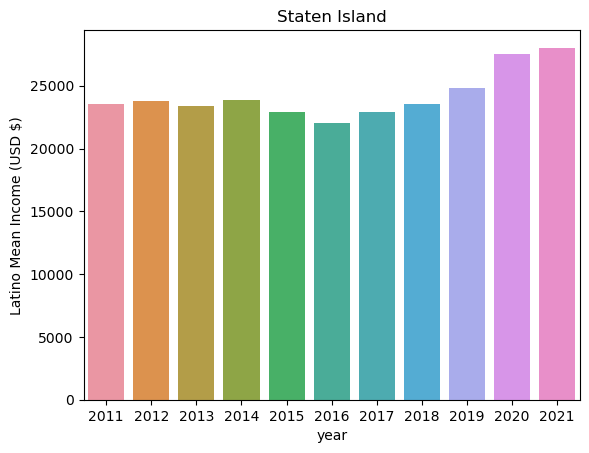

In [15]:
acs_boro = acs_income.groupby(['borough','year'])[['latino_mean_income','white_mean_income']].mean().reset_index()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Brooklyn'], x="year", y="latino_mean_income")
ax.set_title('Brooklyn')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Bronx'], x="year", y="latino_mean_income")
ax.set_title('Bronx')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Manhattan'], x="year", y="latino_mean_income")
ax.set_title('Manhattan')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Queens'], x="year", y="latino_mean_income")
ax.set_title('Queens')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()
ax = sns.barplot(data=acs_boro[acs_boro['borough']=='Staten_Island'], x="year", y="latino_mean_income")
ax.set_title('Staten Island')
ax.set_ylabel('Latino Mean Income (USD $)')
plt.show()

In [18]:
sns.barplot(data=acs_income.melt(id_vars='borough',
                                  value_name='mean_income', var_name='race'),
            x='borough', y='mean_income', hue='race')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [21]:
data = acs_boro.melt(['borough','latino_mean_income','white_mean_income'], var_name='a', value_name='b')
print (data)

          borough  latino_mean_income  white_mean_income     a     b
0           Bronx        16478.730769       21974.346154  year  2011
1           Bronx        16614.923077       22302.576923  year  2012
2           Bronx        16742.115385       22465.769231  year  2013
3           Bronx        16792.730769       22955.461538  year  2014
4           Bronx        16881.807692       22947.384615  year  2015
5           Bronx        17204.884615       23918.230769  year  2016
6           Bronx        18010.576923       25158.346154  year  2017
7           Bronx        19205.653846       26369.076923  year  2018
8           Bronx        20352.692308       27898.346154  year  2019
9           Bronx        21519.769231       28733.423077  year  2020
10          Bronx        23537.592593       33280.148148  year  2021
11       Brooklyn        17997.763158       29253.973684  year  2011
12       Brooklyn        18209.394737       29547.684211  year  2012
13       Brooklyn        18383.447

In [12]:
g = df.groupby(['zipcode','year','borough'])[['latino_mean_income','white_mean_income','white_alone(not_latino)_mean_income']].mean().reset_index()
manhattan=g[g['borough']=='Manhattan']
brooklyn=g[g['borough']=='Brooklyn']

NameError: name 'df' is not defined

In [ ]:
sns.boxplot(data=manhattan, x='year', y='latino_mean_income')

In [ ]:
sns.boxplot(data=brooklyn, x='year', y='latino_mean_income')

In [ ]:
sns.boxplot(data=manhattan, x='year', y='white_mean_income')

In [ ]:
sns.boxplot(data=brooklyn, x='year', y='white_mean_income')